# Fraud Detection on Credit Card Data

## 1. Problem definition 

To apply various classification-based models to detect whether a transaction is fraudulent or not. Our goal is to have a higher classification accuracy while reducing false negatives (cases in which fraudulent transactions incorrectly go unnoticed).

## 2. Loading Python packages and data 

In [1]:
#Loading Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading our classification models and evaluation metrics
from sklearn.model_selection import train_test_split, KFold, \
cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix,\
accuracy_score

## 3. Exploratory Data Analysis

### 3.1 Descriptive statistics

Let us first understand the data we are working with

In [3]:
#Load our dataset
dataset = pd.read_csv("creditcard.csv")

In [4]:
#Shape of the data
dataset.shape

(284807, 31)

We can see that the values in our data have been scaled and anonymized. Feature names are not provided hence visualising the data will not give much insights. Additionally, our entire dataset is float except Class, which is of type integer.  

In [5]:
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's check how many transactions are fraudulent and not fraudulent

In [6]:
class_names = {0: "Not Fraud", 1: "Fraud"}
print(dataset.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


As we can see, most of the transactions are not fraudulent. Hence, we have imbalance in the data. If we train our model using this dataset, our model will place a lot of emphasis on the non-fraud transactions and little emphasis on the fraudulent transactions. As a result, we will have challenges predicting fraudulent transactions as the model will simply assume all transactions are nonfraud.

To solve this, we will downsample the non fraudulent data so we have the same number of fraudulent and non-fraudulent transactions. But first, let's model our data on the entire dataset

### 3.2 Data Visualisation 

We do not know what the features represent hence visualising will not lead to much insights.

## 4. Data Preparation 

The data is already cleaned without any empty rows or columns.

## 5. Evaluate model 

We split the data into training set and test set. We will use 80% of the data for model training and 20% for testing.

In [7]:
# X is all feature columns except Class column
X = dataset.loc[:, dataset.columns != 'Class']
# Y is the Class column
Y = dataset["Class"]
# Set 20% as our testing dataset
validation_size = 0.2
seed = 7
#Split the dataset
X_train, X_validation, Y_train, Y_validation = \
train_test_split(X, Y, test_size = validation_size, random_state = seed)

To optimize the various hyperparameters of the models, we use 10 fold cross validation and recalculate the results ten times to account for the inherent randomness some of the models.

We will use the accuracy metric as it is useful on binary classification problems.

In [8]:
num_folds = 10
scoring = 'accuracy'

We use simpler and faster models since complex models such as neural networks and ensemble will have poor results on the imbalanced dataset. 

In [9]:
#Simple classification algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

We display the mean and standard deviation of accuracy for each algorithm

In [10]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, \
                                scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/fortuneamombo/opt/anaconda3/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fortuneamombo/opt/anaconda3/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LR: 0.998890 (0.000202)
LDA: 0.999350 (0.000149)
CART: 0.999149 (0.000239)
KNN: 0.998332 (0.000310)


Compare algorithms

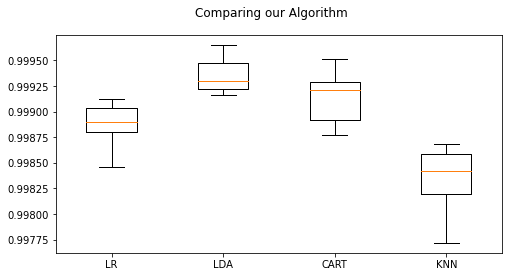

In [11]:
fig = plt.figure()
fig.suptitle('Comparing our Algorithm')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

The accuracy of the overall result is quite high. Let us see how well it predicts the fraudulent transactions. Let's pick the CART model

In [12]:
#Fit model on the training dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [13]:
#Estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9992451107756047
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.78      0.80      0.79       100

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

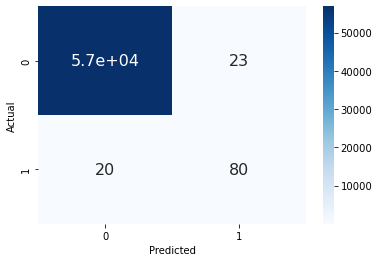

In [14]:
#Construct confusion matrix
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), \
                    columns = np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})

The overall accuracy is strong but the confusion matrix tells a different story. Despite the high accuracy level, 20 out of 100 instances of fraud are missed and incorrectly predicted as nonfraudulent( false negatives).

Let's choose a different evaluation metric, recall. Recall is the total number of items correctly identified as positive out of total true positives. In our case, it is the ratio of true positives to the sum of true positives and false negatives. So, if the false negatives are high, then the value of recall will be low.

## Model Tuning  

We perform model tuning, select the model using the recall metric, and perform under-sampling.

In [15]:
scoring = 'recall'

Apply the same models but using recall evaluation metric.

In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [17]:
#Running cross-validation
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, \
    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/fortuneamombo/opt/anaconda3/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fortuneamombo/opt/anaconda3/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LR: 0.647711 (0.062798)
LDA: 0.754710 (0.046704)
CART: 0.749465 (0.054325)
KNN: 0.033329 (0.028641)


We can see that Linear Discriminant Analysis has the best recall of the four models.

In [18]:
#Fit LDA method
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [19]:
#Estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9995435553526912


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

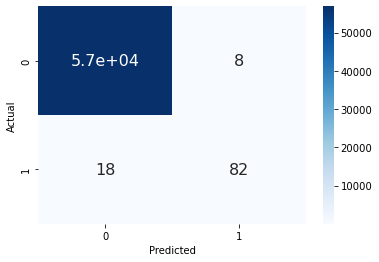

In [20]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), \
                    columns = np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})

LDA performs better, only missing out 18 out of 100 fraudulent cases. Moreover, we find fewer false positives.

However, there is still improvements that we can make.

### Undersampling the data 

The current data that we have is highly unbalanced. This can result in a serious bias towards the majority class, resulting in poor performance of the model. 

One solution is to under-sample the data. One simple technique is to under-sample the majority class randomly and uniformly. This might yield to a loss of information, but it may yield stronger results.

The steps we have used to under-sample the data are:
1. First, we determine how many instances are considered fraudulent transactions and nonfraudulent transactions using value_counts() on the class column.
2. We bring the nonfraudulent transactions count to the same amount as fraudulent transactions. Assuming we want a 50/50 ratio, this will be equivalent to 492 cases of fraud and 492 cases of nonfraudulent transactions.
3. We now have a subsample of our dataframe. We train the models on this subsample. Then we perform this iteration again to shuffle the nonfraud observations in the training sample. We keep track of the model performance to see whether our models can maintain a certain accuracy every time we repeat this process.

In [21]:
df = pd.concat([X_train, Y_train], axis=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:392]

In [22]:
#Our normal distributed data
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

In [23]:
# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
Y_train_new= df_new["Class"]
X_train_new = df_new.loc[:, dataset.columns != 'Class']

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


/Users/fortuneamombo/opt/anaconda3/envs/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


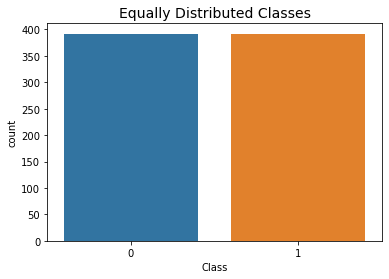

In [24]:
#Visualisation of the distribution of the classes
print('Distribution of the Classes in the subsample dataset')
print(df_new['Class'].value_counts()/len(df_new))
sns.countplot('Class', data=df_new)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

The data is now balanced. We train all the models again. Now that the data is balanced, we will use accuracy as our main evaluation metric, since it considers both false positives and false negatives.

In [25]:
#setting the evaluation metric
scoring='accuracy'

In [26]:
# spot-check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
#models.append(('NN', MLPClassifier()))
# Ensemble Models
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [27]:
# Function to create model, required for KerasClassifier
def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], \
    activation=activation))
    model.add(Dense(32,activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer='adam', \
    metrics=['accuracy'])
    return model
    models.append(('DNN', KerasClassifier(build_fn=create_model,\
    epochs=50, batch_size=10, verbose=0)))

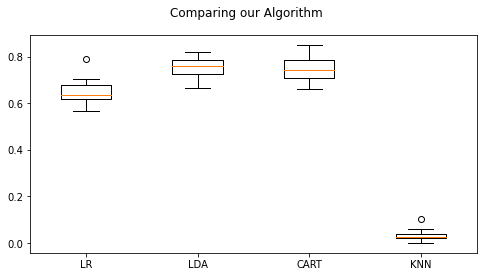

In [28]:
fig = plt.figure()
fig.suptitle('Comparing our Algorithm')
ax = fig.add_subplot(111)
plt.boxplot(results) #results
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

Although most models perform well, Gradient Boost slightly performs better than the other models. We select this for further analysis.

We perform grid search for the gradient boost algorithm by varying the number of estimators and maximum depth.

In [29]:
# Grid Search: GradientBoosting Tuning
n_estimators = [20,180,1000]
max_depth= [2, 3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, \
cv=kfold)
grid_result = grid.fit(X_train_new, Y_train_new)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.933772 using {'max_depth': 3, 'n_estimators': 1000}


We fit the final model and check results on the test set 

In [30]:
# prepare model
model = GradientBoostingClassifier(max_depth= 5, n_estimators = 1000)
model.fit(X_train_new, Y_train_new)

# estimate accuracy on Original validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9665742073663144


Let's look at the confusion matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

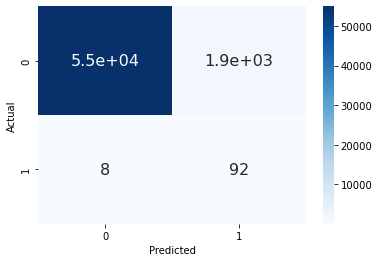

In [31]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), \
                    columns = np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})

The results are pretty impressive. We get high accuracy with low false negatives. However, we see that an outcome of using our under-sampled data is a propensity for false positives (cases in which nonfraudulent transactions are misclassified as fraudulent).

This is a trade-off that a financial institution has to consider. There is an inherent cost balance between the operational overhead, and possible customer experience impact, from processing false positives and the financial loss resulting from missing fraudulent cases through false negatives.